# K-Beauty 성장과 해외 직접 판매 경로 분석

URL: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

필요 라이브러리 호출
- 분석에 필요한 라이브러리
- 시각화에 필요한 라이브러리
- 시각화 폰트 및 깨짐현상 방지 코드

In [2]:
# 필요 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

import os

if os.name =='posix':
    sns.set(font = 'AppleGothic')
elif os.name == 'nt':
    sns.set(font = 'Malgun Gothic')
    
import warnings
warnings.filterwarnings = 'ignore'

In [3]:
#데이터 로드하기

path = 'C:/Users/user/Desktop/TodayLearn/TiL/Code/data'
df_raw = pd.read_csv(f"{path}/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20211215153619.csv", encoding = 'cp949')

## 분석 시각화를 위한 TIDY DATA 작성
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [4]:
df = df_raw.melt(id_vars = ['국가(대륙)별','상품군별','판매유형별'], var_name = '기간', value_name = '판매금액(백만원)')
print(df.shape)
df.head()

(12600, 5)


,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원)
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


# 데이터 전처리

1) 기간에서 연도를 분리하기

In [10]:
int(df['기간'][0].split()[0])

df['연도'] = df['기간'].apply(lambda x : int(x.split()[0]))

2) 기간에서 분기를 분리하기

In [18]:
int(df['기간'][0].split()[1].split('/')[0])
df['분기'] = df['기간'].map(lambda x : int(x.split()[1].split('/')[0]))

df

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1
...,...,...,...,...,...,...,...
12595,기타,생활용품 및 자동차용품,면세점,2020 4/4,0,2020,4
12596,기타,생활용품 및 자동차용품,면세점 이외,2020 4/4,391,2020,4
12597,기타,기 타,계,2020 4/4,870,2020,4
12598,기타,기 타,면세점,2020 4/4,0,2020,4


def func2(data) :
    return data[5:6]

df['분기'] = df['기간'].apply(func2)
df

3) 금액을 수치 데이터로 변경

In [20]:
df['판매금액(백만원)'].replace('-', np.NaN, inplace = True)

df['판매금액(백만원)'] = df['판매금액(백만원)'].astype('float64')
df.info

<bound method DataFrame.info of       국가(대륙)별          상품군별   판매유형별        기간  판매금액(백만원)    연도  분기
0          합계            합계       계  2014 1/4   148272.0  2014   1
1          합계            합계     면세점  2014 1/4        NaN  2014   1
2          합계            합계  면세점 이외  2014 1/4        NaN  2014   1
3          합계    컴퓨터 및 주변기기       계  2014 1/4     4915.0  2014   1
4          합계    컴퓨터 및 주변기기     면세점  2014 1/4        NaN  2014   1
...       ...           ...     ...       ...        ...   ...  ..
12595      기타  생활용품 및 자동차용품     면세점  2020 4/4        0.0  2020   4
12596      기타  생활용품 및 자동차용품  면세점 이외  2020 4/4      391.0  2020   4
12597      기타           기 타       계  2020 4/4      870.0  2020   4
12598      기타           기 타     면세점  2020 4/4        0.0  2020   4
12599      기타           기 타  면세점 이외  2020 4/4      870.0  2020   4

[12600 rows x 7 columns]>

4) 국가 대륙별 합계와 상품군별 합계는 따로 구할 수 있기 때문에 제거하는 것이 필요해요

In [9]:
df = df[~(df['국가(대륙)별'].str.contains('합계')) & ~(df['상품군별'].str.contains('합계'))]

In [23]:
df = df[(df['국가(대륙)별'] != '합계') &(df['상품군별'] != '합계') ]
df.shape

(10584, 7)

# K-Beauty 시각화

Q1. 판매유형별 == '계' 데이터를 추출해보자.(df_total로 변수 저장)

In [33]:
df_total = df[df['판매유형별'] == '계']
df_total

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
12585,기타,아동·유아용품,계,2020 4/4,588.0,2020,4
12588,기타,음·식료품,계,2020 4/4,92.0,2020,4
12591,기타,농축수산물,계,2020 4/4,3.0,2020,4
12594,기타,생활용품 및 자동차용품,계,2020 4/4,391.0,2020,4


Q2. 연도별, 판매액(백만원)에 대한 Line Plot을 그려보자.

<AxesSubplot:xlabel='연도', ylabel='판매금액(백만원)'>

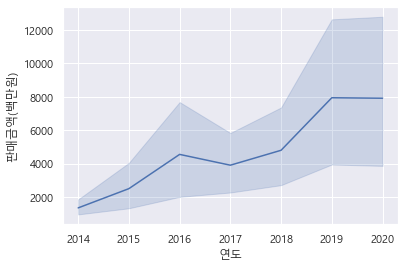

In [34]:
sns.lineplot(data = df, x = '연도', y ='판매금액(백만원)')

Q3. 상품군별 연도별, 판매액에 대한 Line Plot을 그려보자.

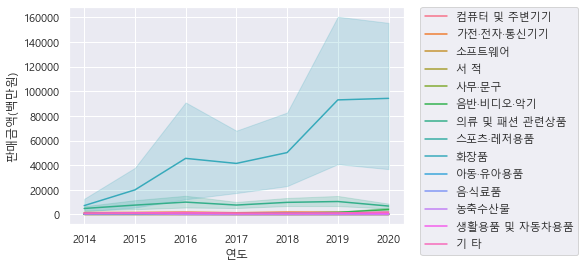

In [35]:
sns.lineplot(data = df, x = '연도', y ='판매금액(백만원)', hue = '상품군별')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0 ) # 1.05밖에 표시
plt.show()

# 화장품의 온라인 쇼핑 직접 판매액

Q4. df_total 변수에서 상품군별 == '화장품' 데이터를 df_cosmetic 변수에 저장해보자.

In [36]:
df_cosmetic = df_total[df_total['상품군별'] == '화장품']
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,유럽연합(EU),화장품,계,2014 1/4,937.0,2014,1
...,...,...,...,...,...,...,...
12402,유럽연합(EU),화장품,계,2020 4/4,1523.0,2020,4
12447,중동,화장품,계,2020 4/4,469.0,2020,4
12492,중남미,화장품,계,2020 4/4,170.0,2020,4
12537,대양주,화장품,계,2020 4/4,471.0,2020,4


Q5. df_cosmetic의 연도별 판매액을 Line plot으로 표현해보자.(hue = 분기)

<AxesSubplot:xlabel='연도', ylabel='판매금액(백만원)'>

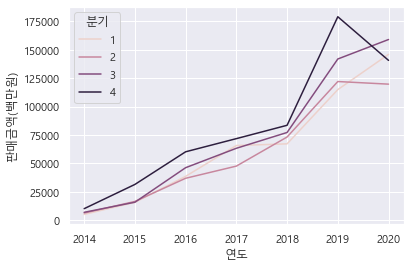

In [37]:
sns.lineplot(data= df_cosmetic, x = '연도', y = '판매금액(백만원)', hue = '분기', ci = None)

Q6. 화장품 판매액에 대한 기간별 금액 데이터 시각화

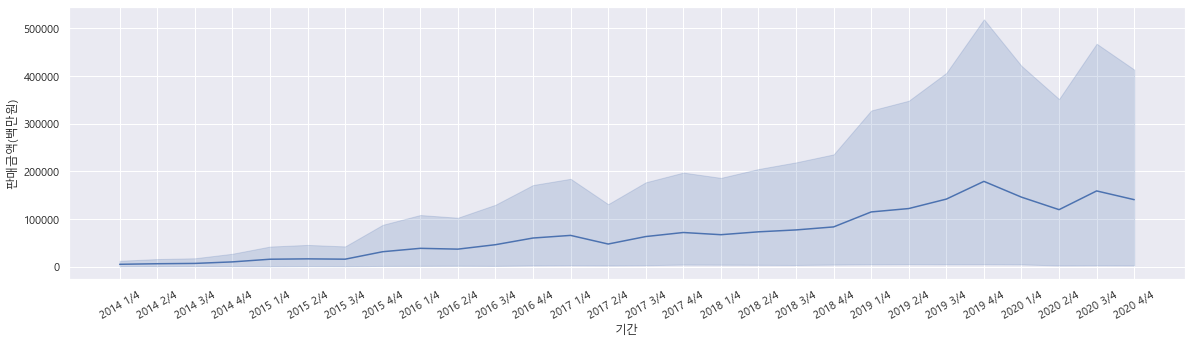

In [15]:
plt.figure(figsize = (20 , 5))
plt.xticks(rotation=30)
sns.lineplot(data = df_cosmetic, x = '기간', y = '판매금액(백만원)')
plt.show()

Q7. 국가 대륙별로 다른 색상으로 표현해보기.

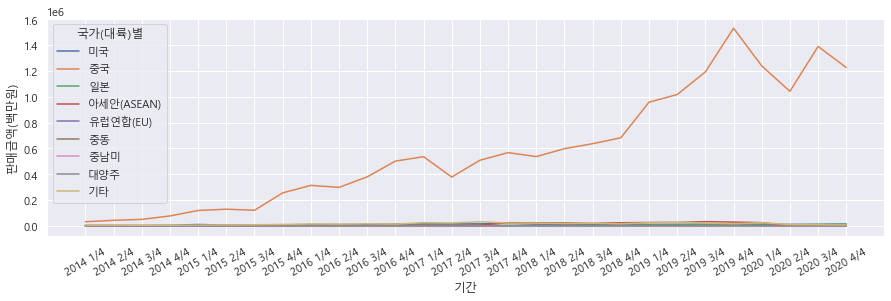

In [38]:
plt.figure(figsize = (15 , 4))
sns.lineplot(data = df_cosmetic, x = '기간', y = '판매금액(백만원)', hue = '국가(대륙)별')
plt.xticks(rotation=30)
plt.show()

Q8. 중국을 제외하고 국가별로 다른 색상으로 표현하기.

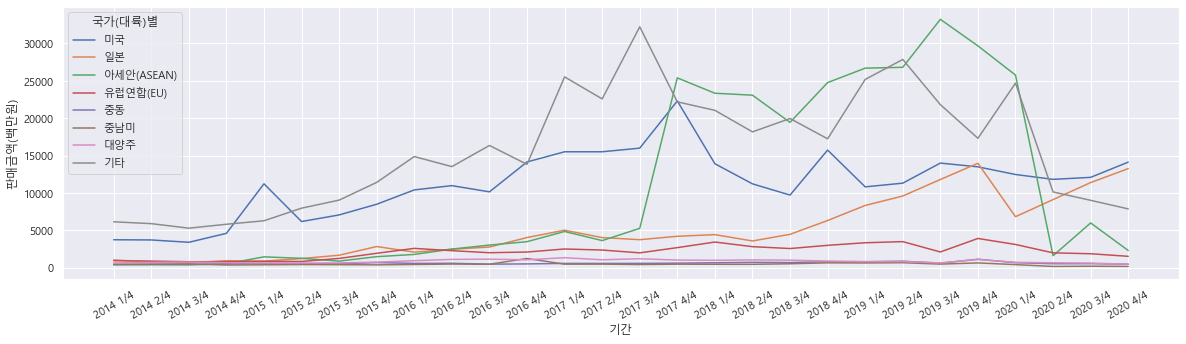

In [17]:
plt.figure(figsize = (20 , 5))
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x = '기간', y = '판매금액(백만원)', hue = '국가(대륙)별')
plt.xticks(rotation=30)
plt.show()

Q9. 판매유형별 화장품 판매액에 대한 기간별 금액 데이터를 시각화하기(Line plot)

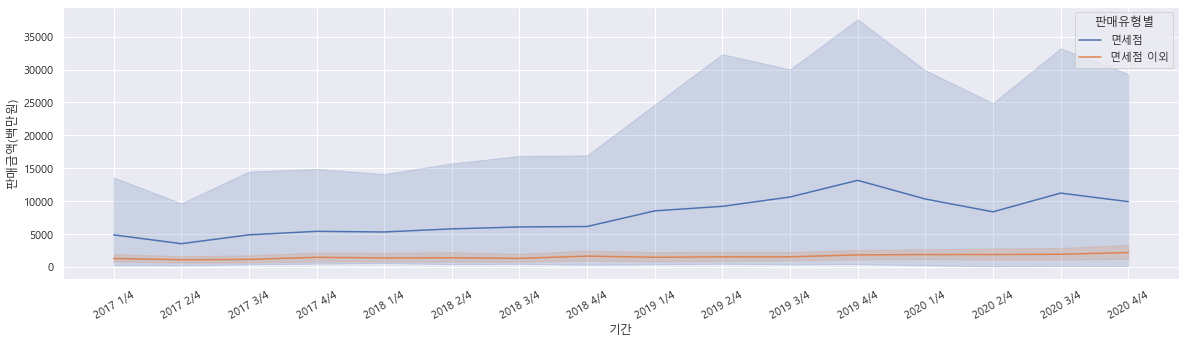

In [18]:
plt.figure(figsize = (20 , 5))
sns.lineplot(data=df[df["판매유형별"] != "계"], x = '기간', y = '판매금액(백만원)', hue = '판매유형별')
plt.xticks(rotation=30)
plt.show()

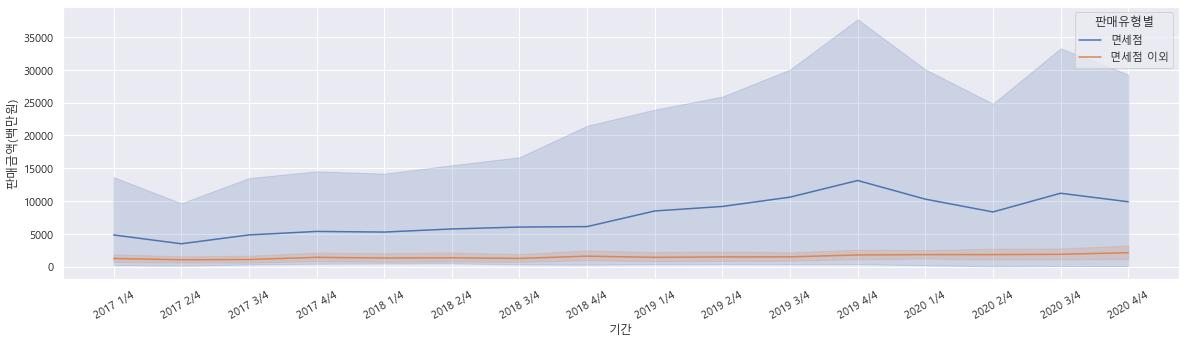

In [19]:
plt.figure(figsize = (20 , 5))
sns.lineplot(data=df[df["판매유형별"] != "계"], x = '기간', y = '판매금액(백만원)', hue = '판매유형별')
plt.xticks(rotation=30)
plt.show()

Q10. 면세점 이외의 데이터들도 증가 했는지 확인해보기

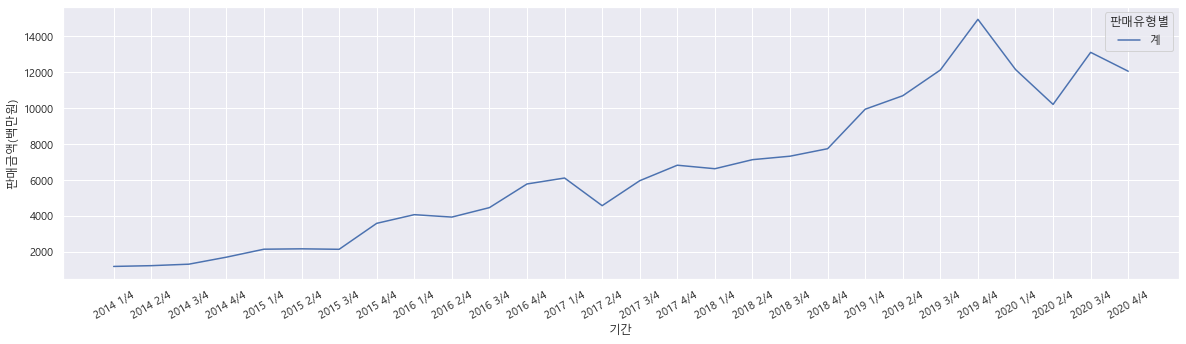

In [20]:
plt.figure(figsize = (20 , 5))
sns.lineplot(data=df[(df["판매유형별"] == "계") & (df['상품군별'] != "면세점")]  , x = '기간', y = '판매금액(백만원)', hue = '판매유형별', ci = None)
plt.xticks(rotation=30)
plt.show()

# 의류 및 패션관련 상품 온라인 쇼핑 해외 직접 판매액

Q11. df_fasion 변수에 의류 관련 상품만 따로 담아주자.(조건1: 상품군별 == '의류 및 패션 관련상품', 조건2: 판매유형별 == '계')

In [21]:
df_fasion = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별'] == '계')].copy()
df_fasion

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1
...,...,...,...,...,...,...,...
12396,유럽연합(EU),의류 및 패션 관련상품,계,2020 4/4,1210.0,2020,4
12441,중동,의류 및 패션 관련상품,계,2020 4/4,400.0,2020,4
12486,중남미,의류 및 패션 관련상품,계,2020 4/4,249.0,2020,4
12531,대양주,의류 및 패션 관련상품,계,2020 4/4,1233.0,2020,4


Q12. 국가별 기간에 따른 금액 데이터 시각화

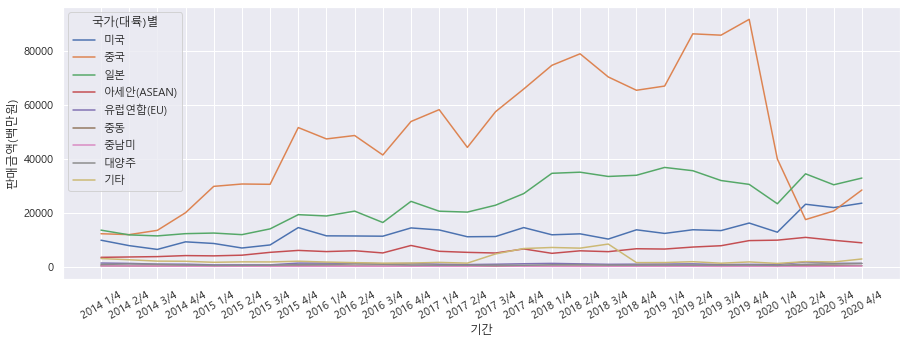

In [25]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fasion, x = '기간', y = '판매금액(백만원)', hue = '국가(대륙)별')
plt.show()

Q13. 판매유형별 기간에 따른 금액 데이터 시각화

In [75]:
df_fasion2 = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별'] != '계')]

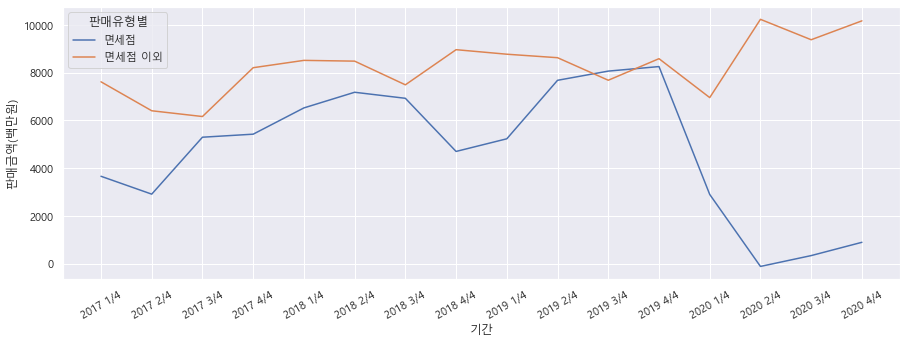

In [76]:

plt.figure(figsize = (15,5))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fasion2, x = '기간', y = '판매금액(백만원)', hue = '판매유형별',  ci = None)
plt.show()

Q14. 국가대륙별, 연도별 합계 금액을 Pivot_table을 통해 구하기

In [66]:
new_df = pd.pivot_table(data = df_fasion, index = ['국가(대륙)별'], columns = ['연도'], values = '판매금액(백만원)', aggfunc = 'sum')
new_df.head(10)

연도,2014,2015,2016,2017,2018,2019,2020
국가(대륙)별,,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0,7734.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0,3686.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0,81297.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0,39313.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0,5045.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0,120817.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0,106318.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0,611.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0,1767.0


Q15. Heatmap을 통해 연도별, 국가별 합계 금액을 시각적으로 표현하기

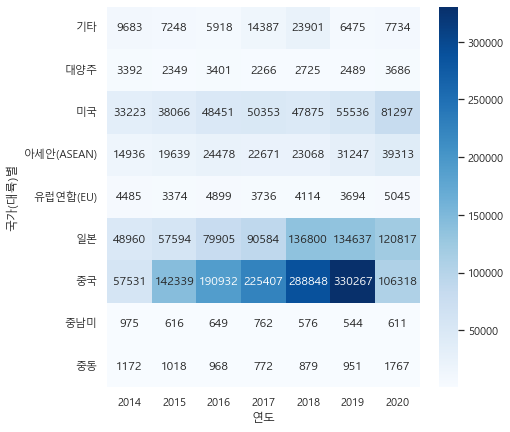

In [62]:
plt.figure(figsize = (7, 7))
sns.heatmap(data = new_df, cmap = 'Blues', annot = True, fmt = 'g')
plt.show()